In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## Problem 2

In [3]:
### Import the data
X_1 = np.load('pulsar_features.npy')
y_1 = np.load('pulsar_labels.npy')

### Notice we first need to transpose the X and y
X = X_1.T
y = y_1.T

In [4]:
# Add one's to the X so that we can estimate b.
X  = np.concatenate((np.ones(X.shape[0]).reshape(-1,1), X), axis = 1)

### Part(b)

In [5]:
theta = np.zeros(3)

In [6]:
### Define the loss function
def loss_function(X, y, theta, lamb):
    loss = 0
    w = theta.copy()[1:]

    for i in range(X.shape[0]):
        loss += (np.max([0, 1 - (y[i] * (np.dot(theta, X[i]))).item(0)]) + lamb * ((np.linalg.norm(w)) ** 2) / 2 )

    loss = loss / X.shape[0]

    return loss

In [7]:
loss_function(X, y, theta, 0.001)

1.0

In [8]:
### Define the subgradient function
def sub_gradient(X, y, theta, lamb):
    subgradient = 0
    w = theta.copy()
    w[0] = 0

    for i in range(X.shape[0]):
        if y[i] * np.dot(theta, X[i]) < 1:
            subgradient += (1 / X.shape[0]) * (-y[i] * X[i] + lamb * w)
        if y[i] * np.dot(theta, X[i]) >= 1:
            subgradient += (1 / X.shape[0]) * lamb * w
        
    return subgradient

In [9]:
sub_gradient(X, y, theta, 0.02)

array([4.22838847e-18, 1.80522359e-01, 8.74244260e-02])

In [10]:
### Start the subgradient method
def sub_grad_method(X, y, theta, lamb, iteration):
    loss_list = []

    for i in range(iteration):
        step_size = 100 / (i + 1)
        theta = theta - step_size * sub_gradient(X, y, theta, lamb)
        loss_list.append(loss_function(X, y, theta, lamb))

    theta_final = theta.copy()

    return theta_final, loss_list

In [11]:
result_subgrad = sub_grad_method(X, y, theta, 0.001, 10)

In [12]:
loss_list = result_subgrad[1]
parameters = result_subgrad[0]

In [13]:
### Get the paramters of the hyperplane
parameters

array([ 12.0680196 , -17.81627138,  -9.11707611])

Text(0, 0.5, 'Total loss')

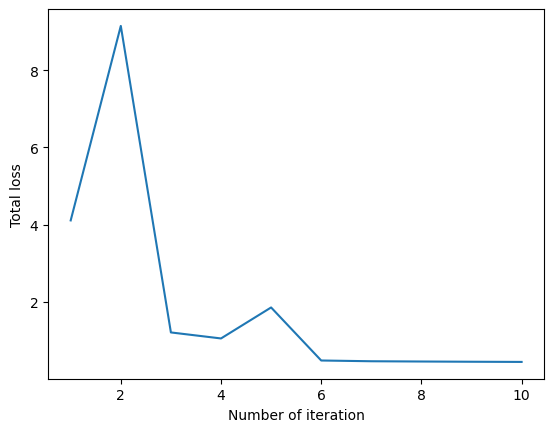

In [14]:
## Draw the picture of loss functions versus number of iteration
plt.plot(list(range(1, 11)), loss_list)
plt.xlabel('Number of iteration')
plt.ylabel('Total loss')

In [15]:
## put all columns into a dataframe so that we can visulize them
data_p1 = pd.DataFrame({
    'X_1': X_1.T[:, 0].tolist(),
    'X_2': X_1.T[:, 1].tolist(),
    'y'  : y_1.T.ravel().tolist()
})

In [16]:
### Get subdata for y = -1 and y = 1
subdata_p1_neg = data_p1[data_p1['y'] == -1]
subdata_p1_pos = data_p1[data_p1['y'] == 1]

In [17]:
### define the line of the hyperplane with derived parameters
X1 = np.linspace(0, 1, 200)
X2 = (parameters[0] + parameters[1] * X1)/(-parameters[2])

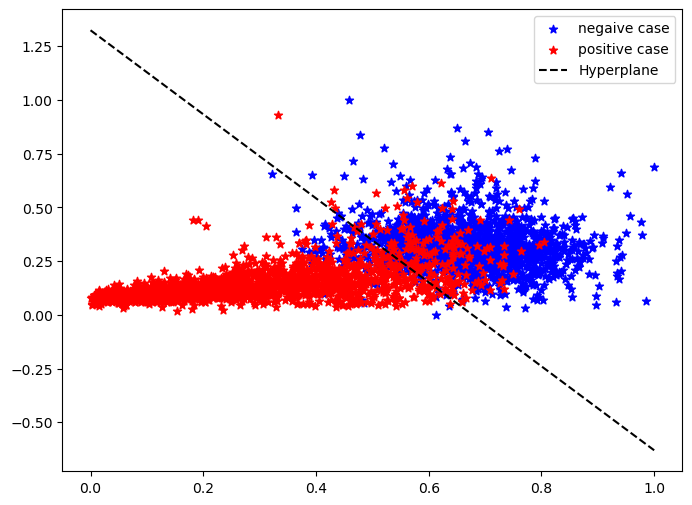

In [18]:
### Start visulization
### Negative case meaning label of y = -1. Positive case meaning label of y = 1
plt.figure(figsize = (8, 6))
plt.scatter(x = 'X_1', y = 'X_2', color = 'blue', marker = '*', data = subdata_p1_neg, label = 'negaive case')
plt.scatter(x = 'X_1', y = 'X_2', color = 'red', marker = '*', data = subdata_p1_pos, label = 'positive case')
### Add the line of hyperplane
plt.plot(X1, X2, linestyle = '--', color = 'black', label = 'Hyperplane')
plt.legend()

In [19]:
## Get the minimum achived value of the objective function
print('The mininum achived value of the objective function is:', loss_list[-1])

The mininum achived value of the objective function is: 0.44988413706113156


In [20]:
## Get the margin
print('The margin is:', 1/np.linalg.norm(parameters[1:]))

The margin is: 0.049966246537370425


## Part(c)

In [21]:
### Define the function of subgradient for a single point
def single_subgradient(X, y, theta, lamb, row_dimension):
    w = theta.copy()
    w[0] = 0
    if y * (np.dot(theta, X)) < 1:
        return 1/row_dimension * (-y * X + lamb * w)
    
    if y * (np.dot(theta, X)) >= 1:
        return lamb/row_dimension * w

In [22]:
### Define the SGD function
def stochastic_grad_method(X, y, theta, lamb, iteration):
    np.random.seed(0)
    loss = []
    for j in range(iteration):
        step_size = 100 / (j + 1)
        for i in np.random.permutation(X.shape[0]):
            theta = theta - step_size * single_subgradient(X[i], y[i], theta, lamb, X.shape[0])

        theta_outer = theta.copy()
        loss.append(loss_function(X, y, theta_outer, lamb))
    
    return theta_outer, loss

In [23]:
sgd_result = stochastic_grad_method(X, y, theta, 0.001, 10)

In [24]:
### Extract the loss and the final parameter
sgd_loss = sgd_result[1]
sgd_parameter = sgd_result[0]

In [25]:
print("The minimum achieved value of the objective function is:", sgd_loss[-1])

The minimum achieved value of the objective function is: 0.2582782419707577


In [26]:
### show the parameters of SGD method
sgd_parameter

array([ 4.00515219, -5.82463117, -4.41417027])

In [27]:
### define the line of the hyperplane with derived parameters
X1_sgd = np.linspace(0, 1, 200)
X2_sgd = (sgd_parameter[0] + sgd_parameter[1] * X1_sgd)/(-sgd_parameter[2])

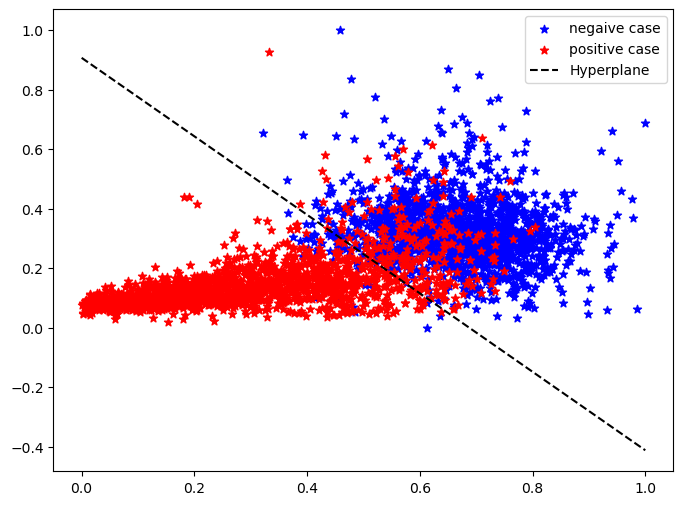

In [28]:
### Start visulization
### Negative case meaning label of y = -1. Positive case meaning label of y = 1
plt.figure(figsize = (8, 6))
plt.scatter(x = 'X_1', y = 'X_2', color = 'blue', marker = '*', data = subdata_p1_neg, label = 'negaive case')
plt.scatter(x = 'X_1', y = 'X_2', color = 'red', marker = '*', data = subdata_p1_pos, label = 'positive case')
### Add the line of hyperplane
plt.plot(X1_sgd, X2_sgd, linestyle = '--', color = 'black', label = 'Hyperplane')
plt.legend()

In [29]:
## Get the margin
print('The margin is:', 1/np.linalg.norm(sgd_parameter[1:]))

The margin is: 0.13683075407918574


Text(0, 0.5, 'Total loss')

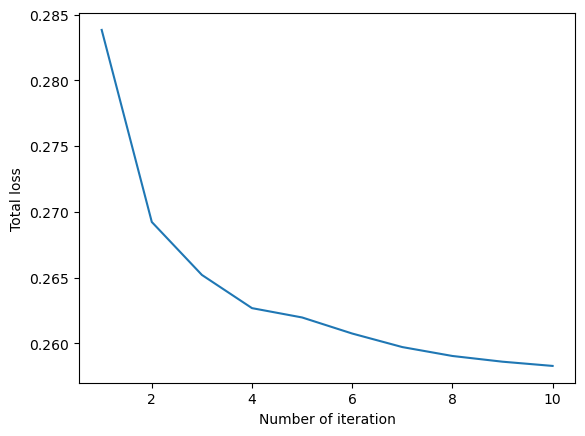

In [30]:
plt.plot(list(range(1, 11)), sgd_loss)
plt.xlabel('Number of iteration')
plt.ylabel('Total loss')

It seems that the SGD method converges much faster than the subgradient method.

## Problem 3

### Part(a)

In [31]:
X_train = np.load('housing_train_features.npy')
y_train = np.load('housing_train_labels.npy')

X_test = np.load('housing_test_features.npy')
y_test = np.load('housing_test_labels.npy')

X_train = X_train.T
X_test = X_test.T


In [32]:
np.sum(X_test[:, 4]) == 0

True

In [33]:
## Normalization, first find mean and standard deviation for train data
train_covariates_mean = np.mean(X_train, axis = 0)
train_deviation_std = np.std(X_train, axis = 0)

normalized_train = (X_train - train_covariates_mean) / train_deviation_std

In [34]:
## Normalization, first find mean and standard deviation for test data
test_covariates_mean = np.mean(X_test, axis = 0)
test_deviation_std = np.std(X_test, axis = 0)

normalized_test = (X_test - test_covariates_mean) / test_deviation_std

C:\Users\16343\AppData\Local\Temp\ipykernel_71648\2538276479.py:5: RuntimeWarning: invalid value encountered in divide
  normalized_test = (X_test - test_covariates_mean) / test_deviation_std


In [35]:
normalized_test = np.nan_to_num(normalized_test, nan = 0)

In [36]:
## Verify the mean and variance of normalized train data
mean_normalized = np.mean(normalized_train, axis = 0)
var_normalized = np.var(normalized_train, axis = 0)

In [37]:
mean_normalized[:5]

array([-2.06945572e-16, -4.97379915e-17, -7.88702437e-16,  7.46069873e-17,
        9.76996262e-18])

In [38]:
var_normalized[:5]

array([1., 1., 1., 1., 1.])

Text(0, 0.5, 'mean of the normalized feature value')

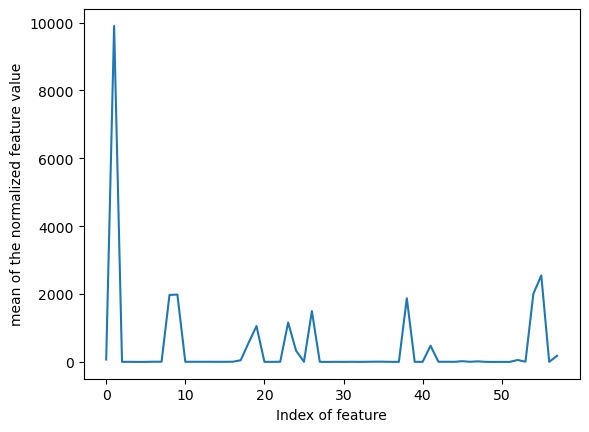

In [39]:
### Get the plot of mean and variance
plt.plot(np.arange(np.shape(mean_normalized)[0]), np.mean(X_train, axis = 0))
plt.xlabel('Index of feature')
plt.ylabel('mean of the normalized feature value')

Text(0, 0.5, 'var of the normalized feature value')

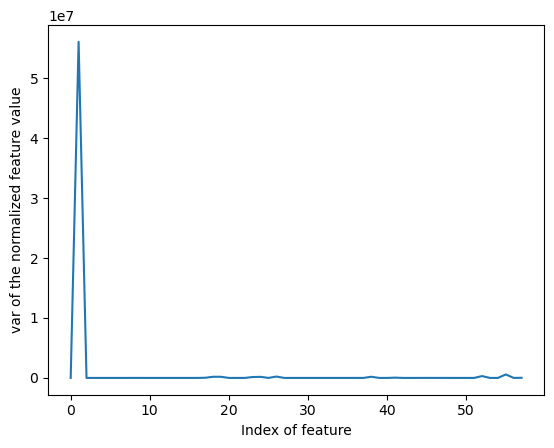

In [40]:
plt.plot(np.arange(np.shape(mean_normalized)[0]), np.var(X_train, axis = 0))
plt.xlabel('Index of feature')
plt.ylabel('var of the normalized feature value')

### Part(b)

In [444]:
### define the dimension of the normalized training data
n, d = normalized_train.shape

In [447]:
## define the function of computing alpha
def computing_alpha(X, column_number):
    alpha = 2 * (np.dot(X[:, column_number], X[:, column_number]))/n
    return alpha

In [463]:
## define the function of computing c at each iteration
def computing_c(X, y, column_number, w, b):
    sum = 0
    w_inner = w.copy()
    w_inner[column_number] = 0
    
    for i in range(n):
        sum += X[i][column_number] * (y[i] - np.dot(w_inner, X[i]) - b) 
    
    sum = 2 * sum / n

    return sum

In [464]:
## define the soft function
def soft_function(a, b):
    if a > b:
        return a - b
    if a < -b:
        return a + b
    else:
        return 0

In [465]:
### initialize w and b
w = np.ones(d)
b = np.ones(1)
lamb = 100 / n
iteration = 2900

In [466]:
## Start the Coordinate Descent algorithm
def CD_method(X, y, w, b, lamb, iteration):
    for i in range(iteration):
        b = np.mean(y) - np.dot(w, np.mean(X, axis = 0))
        for j in range(d):
            ## Compute c and a inside of the loop
            c = computing_c(X, y, j, w, b)
            a = computing_alpha(X, j)
            ## computing soft value and update w_j
            soft_value = soft_function(c / a, lamb / a)
            w[j] = soft_value
    
    return w, b

In [467]:
result = CD_method(normalized_train, y_train, w, np.mean(y_train), lamb, iteration)

In [468]:
final_w = result[0]
final_b = result[1]

In [469]:
result

(array([ 2.99575334e+00,  4.79116557e+00,  2.45387945e+00,  2.94461786e-01,
        -4.09224509e-01, -5.63272845e-02,  1.32144814e+01,  6.29681834e+00,
         8.33256016e+00,  1.66730553e+00, -1.03933462e+01,  1.50871954e+00,
        -6.58841800e+00, -6.19700809e-01, -1.66831097e+00,  1.34224205e+00,
        -8.12517801e-01, -2.81963635e+00, -1.02007601e+01,  1.15785740e+01,
        -1.31149714e+00,  5.58964888e-01, -9.85282822e-01,  0.00000000e+00,
         2.06308197e+00, -1.09270225e-01,  1.02309765e+01,  8.80246342e-01,
        -6.34243842e-01, -1.70020031e+00,  3.14609340e-01, -4.22716224e+00,
        -5.54398388e+00, -3.12550025e+00,  5.12569530e+00,  2.94668204e+00,
         6.39078873e+00, -5.23618774e+00, -1.22609006e+00, -9.68079116e-01,
         1.34086435e+00,  7.09206669e+00, -3.05421368e+00,  2.38817421e+00,
         0.00000000e+00,  1.95892192e-02, -6.44737471e-01,  1.58019326e+00,
         1.23972670e+00,  0.00000000e+00,  4.95102062e-01,  2.05324605e-02,
        -5.3

In [470]:
### count how many zeros in the final w
zero_count = final_w.shape[0] - np.count_nonzero(final_w)
print("The number of zeros in w is:", zero_count)

The number of zeros in w is: 4


In [471]:
### find the MSE of this model using test set
def calculate_MSE(X, y, w, b):
    MSE = 0
    for i in range(X.shape[0]):
        MSE += (np.dot(w, X[i]) + b - y[i]) ** 2

    MSE = MSE / X.shape[0]
    return MSE

In [472]:
calculate_MSE(normalized_test, y_test, final_w, final_b)

754.7914449031186